# Linear Regression Project For Car Auction Sales



## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# the creation of the dataframe
%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

<ipython-input-1-69f679858591>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.info()
# this is to gather information on every column and what data type it is using


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [ ]:
df.describe()


,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [ ]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

Small note some cloumns where not inspected because are probably going to be droped like vin

In [ ]:
df.make.unique()
# extracting all the unique variables of make

array(['Hyundai', 'Toyota', 'Lexus', 'BMW', 'Ford', 'Kia', 'Chevrolet',
       'Cadillac', 'Mercedes-Benz', 'Jeep', 'Infiniti', 'Lincoln',
       'Mazda', 'Chrysler', 'GMC', 'Honda', 'Dodge', 'Audi', 'Nissan',
       'Buick', 'MINI', 'Jaguar', 'Volvo', 'Mitsubishi', 'Volkswagen',
       'Subaru', 'Porsche', 'Isuzu', 'Saturn', 'Pontiac', 'Scion',
       'Acura', 'Ram', 'Land Rover', 'Suzuki', 'Mercury', 'HUMMER',
       'Saab', 'Maserati', 'FIAT', 'Geo', 'smart', 'Oldsmobile', 'Fisker',
       'Bentley', 'Plymouth', 'Ferrari', 'Aston Martin'], dtype=object)

In [ ]:
df.model.unique()
# extracting all the unique variables of model

array(['Sonata', '4Runner', 'IS 250', 'X5', 'E-Series Van', 'Optima',
       'Avalanche', 'CTS', 'E-Class', 'Forte', 'Wrangler', 'G Sedan',
       'MKS', 'Soul', 'Ranger', 'Mazda6', 'Tundra', 'PT Cruiser',
       'Acadia', 'Mustang', 'Odyssey', 'X3', 'STS', 'F-150', 'Sienna',
       'Liberty', 'DTS', 'Sebring', 'Nitro', 'Tacoma', 'Elantra', 'Q7',
       'Maxima', 'Corvette', 'Grand Cherokee', 'FJ Cruiser', 'Fiesta',
       'Genesis', 'Town and Country', 'F-350 Super Duty', 'Z4', 'Murano',
       'Enclave', 'Altima', 'Sentra', 'R-Class', 'Sierra 1500', 'Cooper',
       'XJ', 'Edge', 'Focus', 'Avenger', 'Civic', 'Escape', 'Camry',
       'Encore', 'Accord', 'Sonic', 'Yukon', 'XF', 'Savana Cargo',
       'Fusion', '200', 'Cruze', 'MKX', 'Stratus', 'S60', 'Taurus',
       'Corolla', 'CR-V', 'Tucson', 'Charger', 'Lancer', 'Malibu',
       'Mazda3', 'Jetta', 'Elantra GT', '3 Series', 'Leaf',
       'Express Cargo', 'Outlander Sport', 'Venza', 'F-250 Super Duty',
       'Versa', 'Rogue', 'Imp

In [ ]:
df.body.unique()
# extracting all the unique variables of body

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

here we will decrease the data by normalizing the car body

In [ ]:
df.transmission.unique()
# extracting all the unique variables of transmission

array(['automatic', 'manual'], dtype=object)

will encode this later

In [ ]:
df.condition.unique()
# extracting all the unique variables of condition

array([3.9, 4.9, 4.1, 1.9, 4.6, 3.6, 1.7, 5. , 4.4, 2.7, 1. , 4.2, 2.5,
       3.5, 4. , 3. , 3.1, 2.4, 4.7, 4.5, 3.3, 2.9, 3.4, 2.8, 2.1, 4.3,
       2.3, 3.7, 3.2, 2. , 2.2, 2.6, 3.8, 4.8, 1.4, 1.6, 1.1, 1.8, 1.3,
       1.5, 1.2])

In [ ]:
df.color.unique()
# extracting all the unique variables of color

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', '—', 'yellow', 'brown',
       'turquoise', 'orange', 'off-white', 'charcoal', 'pink', 'lime'],
      dtype=object)

Must replace "-" with the mod of colors

In [ ]:
df.interior.unique()
# extracting all the unique variables of interior

array(['gray', '—', 'black', 'beige', 'tan', 'red', 'blue', 'brown',
       'off-white', 'silver', 'orange', 'purple', 'white', 'gold',
       'burgundy', 'green', 'yellow'], dtype=object)

Must replace "-" with the mod of colors

In [ ]:
df.seller.unique()
# extracting all the unique variables of seller

array(['the hertz corporation', 'award auto sales and leasing inc',
       'lexus financial services', ..., 'bmw of fresno',
       'my mint car corp', 'carter federal credit union'], dtype=object)

might drop not sure how it would beneft us and normalization would be a pain

In [ ]:
df.mmr.unique()
# extracting all the unique variables of mmr

array(['$11000', '$28700', '$22200', ..., '$51500', '$57900', '$94000'],
      dtype=object)

will remove "$" for later and change dType

In [ ]:
df.sellingprice.unique()
# extracting all the unique variables of sellingrpice

array(['$10900', '$29900', '$24200', '$3200', '$22100', '$15500',
       '$13600', '$14700', '$20000', '$27500', '$22250', '$23700',
       '$12000', '$3700', '$5500', '$7300', '$800', '$18000', '$12500',
       '$8900', '$36500', '$5900', '$16300', '$17800', '$8300', '$3000',
       '$700', '$5100', '$23000', '$9100', '$40250', '$17900', '$51000',
       '$20600', '$12900', '$9200', '$19600', '$18900', '$25000', '$8600',
       '$20900', '$28750', '$31700', '$11900', '$1250', '$6700', '$8200',
       '$2800', '$27000', '$21300', '$9500', '$13200', '$11400', '$8700',
       '$11200', '$13700', '$17000', '$22300', '$5200', '$3400', '$19800',
       '$1100', '$19000', '$7500', '$2100', '$19300', '$12800', '$8000',
       '$11600', '$13900', '$9000', '$8400', '$4800', '$15700', '$15000',
       '$14400', '$20400', '$14600', '$34000', '$13750', '$8500',
       '$10300', '$10600', '$10000', '$1300', '$30000', '$6200', '$25500',
       '$12100', '$11000', '$22800', '$44250', '$7100', '$12600

also remove "$" and change dType

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

Steps planned channging data types of odometer, mmr, selling price.
Drop table columns that wont be used or be relvant to visualization.
also we will normalize the amount of body types to the 8 given

In [ ]:
df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
# Since there are so many unnecessary unique variables of body that are the same thing (for example: sedan and Sedan), we reduce the body category to just 8 variables
import re

def reduce_body_category(body):
    body = body.lower()
    if 'sedan' in body:
        return 'Sedan'
    elif 'suv' in body:
        return 'SUV'
    elif 'coupe' in body or 'koup' in body:
        return 'Coupe'
    elif 'hatchback' in body:
        return 'Hatchback'
    elif 'minivan' in body or 'van' in body:
        return 'Minivan'
    elif 'wagon' in body:
        return 'Wagon'
    elif 'pickup' in body or 'cab' in body or 'supercrew' in body:
        return 'Pickup Truck'
    elif 'convertible' in body:
        return 'Convertible'
    else:
        return body

df['body'] = df['body'].apply(reduce_body_category)

df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
df.body.unique()
#this is the new body column, huge difference in number.

array(['Sedan', 'SUV', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

we search for certain words then if found we extract and replace them with the 8 avalibe categories from what i understand Van are aslo minivan

In [ ]:
#here we get the mode of the colors, The mode is the value that appears most frequently in the dataset.
df.color.mode()

0    black
Name: color, dtype: object

Replace the nulls from colors we will first get the mod of the columns

In [ ]:
df['color']= df['color'].replace('—', 'black')
df.color.unique()
#there was a blank space inside the column color so we just replaced it with black

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', 'yellow', 'brown', 'turquoise',
       'orange', 'off-white', 'charcoal', 'pink', 'lime'], dtype=object)

Removing nulls with black

In [ ]:

df.interior.mode()

0    black
Name: interior, dtype: object

Replace the nulls from interior we will first get the mod of the columns

In [ ]:
df['interior']= df['interior'].replace('—', 'black')
df.color.unique()

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', 'yellow', 'brown', 'turquoise',
       'orange', 'off-white', 'charcoal', 'pink', 'lime'], dtype=object)

Removing nulls with black

In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,black,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


We dropped these following columns because from our business understanding we do not need these columns because they do not provide any substantial impact on the regression model

In [ ]:

df.drop(columns=['vin', 'state', 'saledate','seller'], inplace=True)
df.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,mmr,sellingprice
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,3.9,50404.0mi,black,gray,$11000,$10900
1,2014,Toyota,4Runner,SR5,SUV,automatic,4.9,17846.0mi,gray,black,$28700,$29900
2,2012,Lexus,IS 250,Base,Sedan,automatic,4.1,21122.0mi,silver,black,$22200,$24200
3,2002,BMW,X5,4.4i,SUV,automatic,1.9,145303.0mi,black,black,$3675,$3200
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,4.9,6714.0mi,white,gray,$22500,$22100


In [ ]:

df['mmr'] = df['mmr'].str.replace('[$, ]', '', regex=True)
df['mmr'] = pd.to_numeric(df['mmr'])

df['sellingprice'] = df['sellingprice'].str.replace('[$, ]', '', regex=True)
df['sellingprice'] = pd.to_numeric(df['sellingprice'])

df['odometer'] = df['odometer'].str.replace('[mi, ]', '', regex=True)
df['odometer'] = pd.to_numeric(df['odometer'])


In [ ]:
df.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,mmr,sellingprice
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,3.9,50404.0,black,gray,11000,10900
1,2014,Toyota,4Runner,SR5,SUV,automatic,4.9,17846.0,gray,black,28700,29900
2,2012,Lexus,IS 250,Base,Sedan,automatic,4.1,21122.0,silver,black,22200,24200
3,2002,BMW,X5,4.4i,SUV,automatic,1.9,145303.0,black,black,3675,3200
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,4.9,6714.0,white,gray,22500,22100
...,...,...,...,...,...,...,...,...,...,...,...,...
295,2014,Dodge,Charger,SXT,Sedan,automatic,4.3,2535.0,black,black,22900,24100
296,2008,Ford,Escape,XLT,SUV,automatic,4.7,83526.0,silver,black,7600,8600
297,2013,Honda,Accord,EX-L V-6,Coupe,manual,4.6,66666.0,black,black,17950,17250
298,2013,Toyota,Prius,Two,Hatchback,automatic,4.0,49663.0,black,gray,15050,15600


In [ ]:
df. dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
condition       float64
odometer        float64
color            object
interior         object
mmr               int64
sellingprice      int64
dtype: object

## Exploratory Data Analysis


**Most popular car exterior color**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

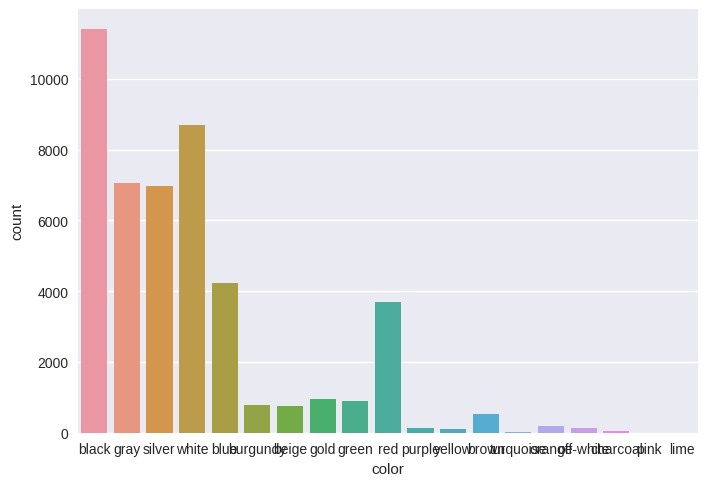

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

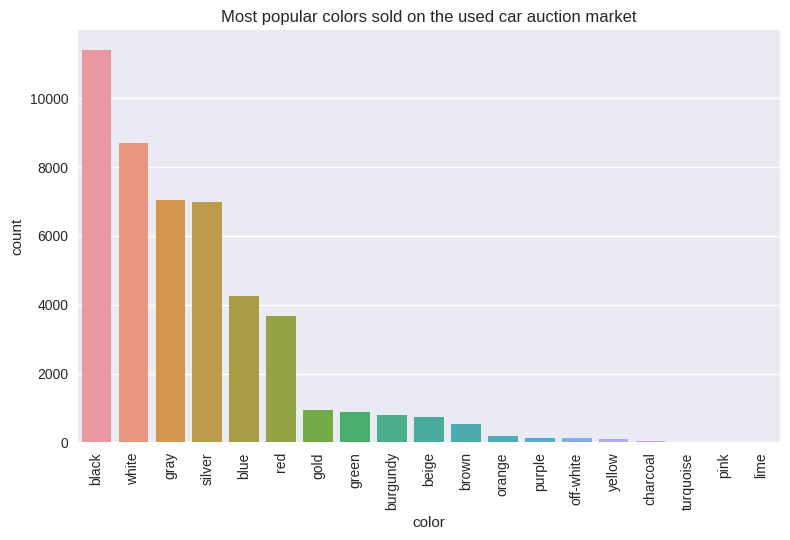

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**The most popular car brands.**


**Visualization**

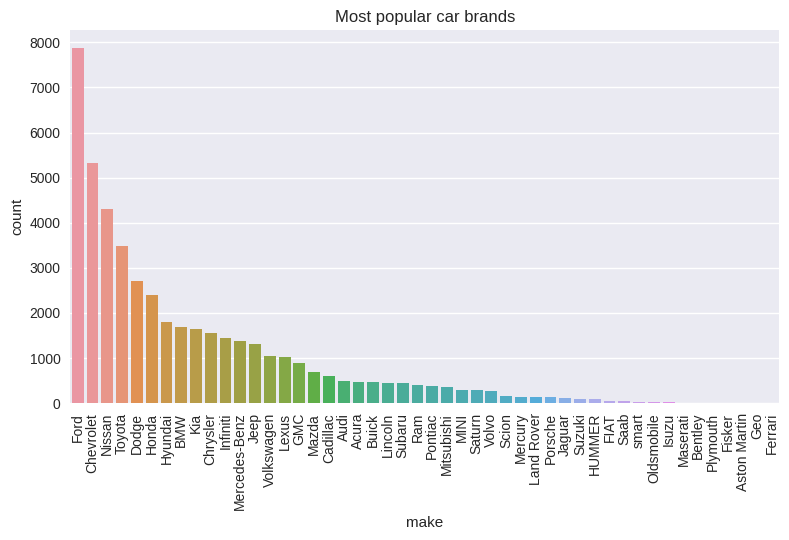

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands')
plt.xticks(rotation=90)
plt.tight_layout()



As we can clearly see from the count plot the number one popular car is Ford followed by Chevrolet and lastsly Nissan


**Bar plot showing the selling price of each of the transmission categories.**


**Visualization**

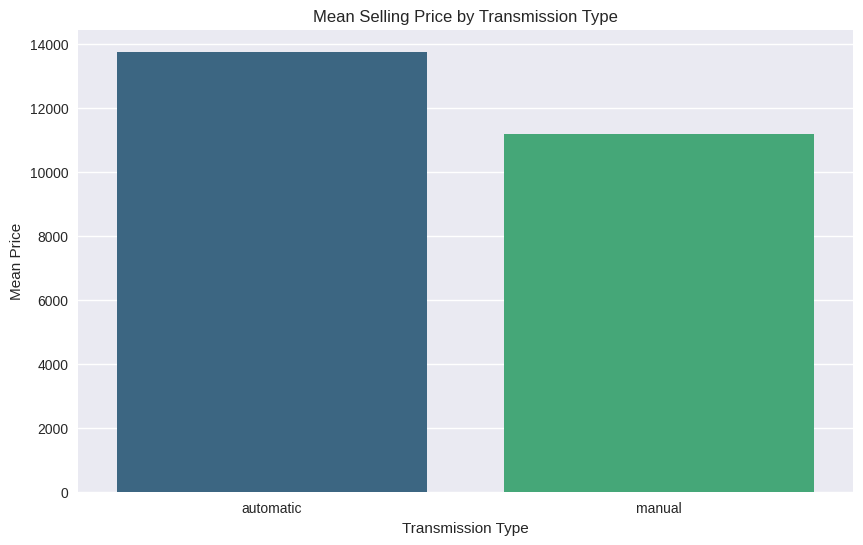

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



transmission_prices = df.groupby('transmission')['sellingprice'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=transmission_prices, x='transmission', y='sellingprice', palette='viridis')
plt.xlabel('Transmission Type')
plt.ylabel('Mean Price')
plt.title('Mean Selling Price by Transmission Type')

plt.show()


Automatic transmission has over all higher mean price over manual transmission


**Box plot showing the distribution of the selling prices of each car make.**


**Visualization**

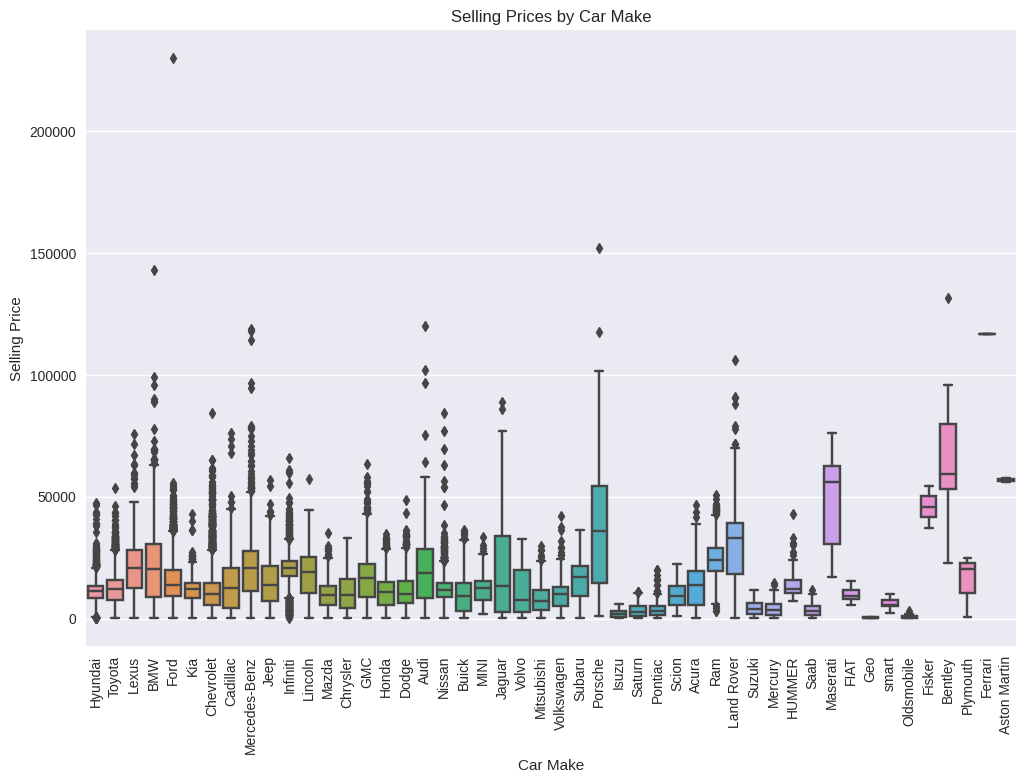

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='make', y='sellingprice', data=df)
plt.xticks(rotation=90)
plt.title('Selling Prices by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Selling Price')
plt.show()



The widest distributions would be Porsche and Masarati as their prices have the biggest ranges according to their box plots. As for which ones are the most expensive, it would be Bentley and Maserati with the most expensive prices.

How correlated is the odometer reading or mileage with the car's sale price?

**Visualization**

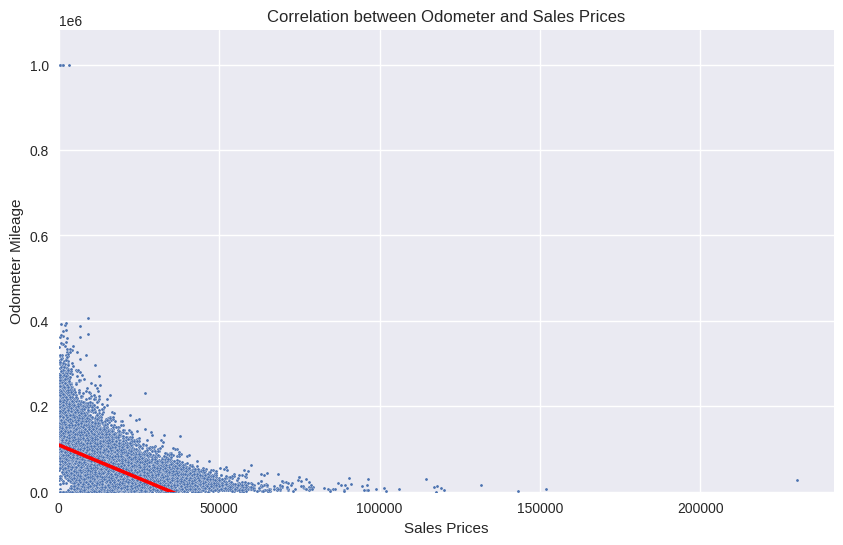

"import matplotlib.pyplot as plt\nimport seaborn as sns\n\nplt.figure(figsize=(10, 6))\nplot = sns.lmplot(x = 'sellingprice', y = 'odometer', data=df, palette='magma', height=8, scatter_kws={'s': 5})\nplot.set(ylim=(0, None), xlim=(0, None))\nplt.title('Correlation between Odometer and sales prices')\nplt.xlabel('sales prices')\nplt.ylabel('odometer mileage')\n\nplt.show()"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sellingprice', y='odometer', data=df, s=5)

# Create a linear regression line
sns.regplot(x='sellingprice', y='odometer', data=df, scatter=False, color='red')

plt.ylim(0, None)
plt.xlim(0, None)
plt.title('Correlation between Odometer and Sales Prices')
plt.xlabel('Sales Prices')
plt.ylabel('Odometer Mileage')

plt.show()



'''import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plot = sns.lmplot(x = 'sellingprice', y = 'odometer', data=df, palette='magma', height=8, scatter_kws={'s': 5})
plot.set(ylim=(0, None), xlim=(0, None))
plt.title('Correlation between Odometer and sales prices')
plt.xlabel('sales prices')
plt.ylabel('odometer mileage')

plt.show()''' #OLD CODE check the one above hazem if its better if not use old one


The more mileage on the odometer the less the prices so the correlation here is negative.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

<Figure size 1000x600 with 0 Axes>

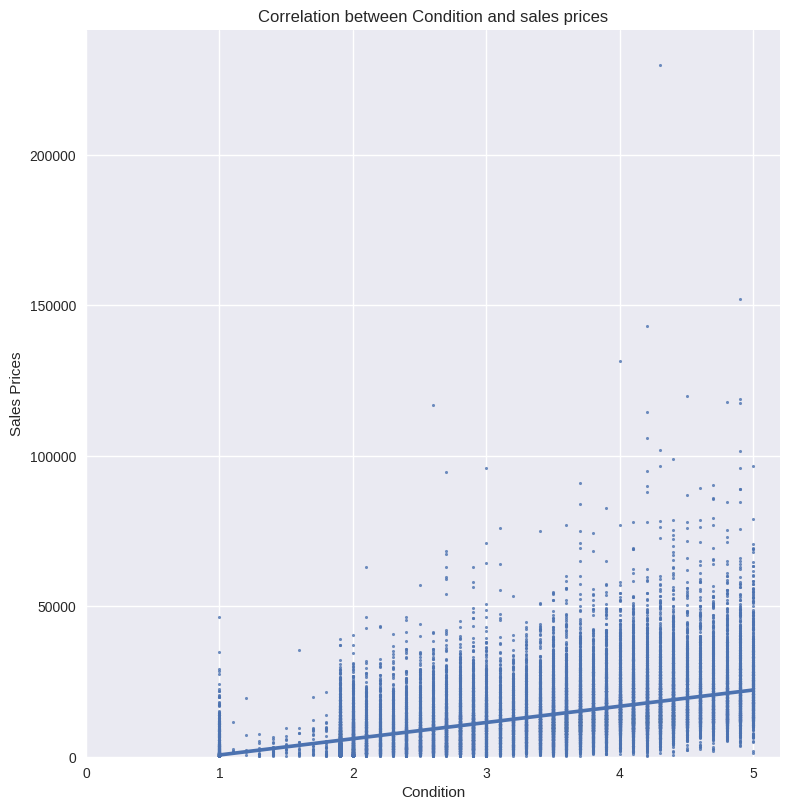

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plot = sns.lmplot(x = 'condition', y = 'sellingprice', data=df, palette='magma', height=8, scatter_kws={'s': 5})
plot.set(ylim=(0, None), xlim=(0, None))
plt.title('Correlation between Condition and sales prices')
plt.xlabel('Condition')
plt.ylabel('Sales Prices')

plt.show()

There seems to be a positive correlation between both of these points as the condition increases the price also increases.

 **Bar plot showing the selling price of each of the body categories.
is there car price diffrence due to the car’s body type?**

**Visualization**

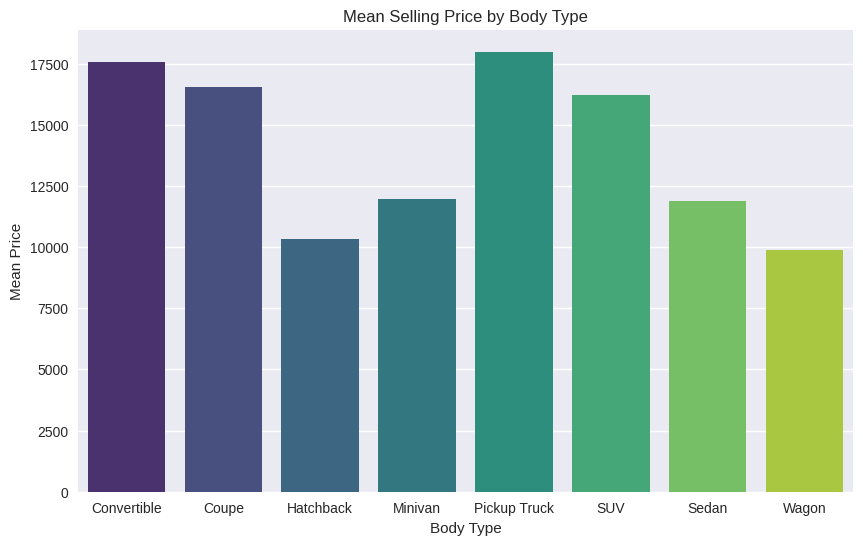

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

body_prices = df.groupby('body')['sellingprice'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=body_prices, x='body', y='sellingprice', palette='viridis')
plt.xlabel('Body Type')
plt.ylabel('Mean Price')
plt.title('Mean Selling Price by Body Type')

plt.show()

Yes they are all very different.
Ranking goes, pickup truck, convertible, Coupe, SUV, Minivan, Sedan, Hatchback and Wagon being the least expensive.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

x = df.drop('model',axis=1) # Independent variable
y = df['model'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


ENCODING


We dropped these columns due to irrelavent correlation to sellingrpice and for mmr we dropped it since it creates overfitting model.

In [ ]:
df.drop(columns=['trim','model','mmr','interior', 'transmission', 'color'], inplace=True)
df.head()

,year,make,body,condition,odometer,sellingprice
0,2013,Hyundai,Sedan,3.9,50404.0,10900
1,2014,Toyota,SUV,4.9,17846.0,29900
2,2012,Lexus,Sedan,4.1,21122.0,24200
3,2002,BMW,SUV,1.9,145303.0,3200
4,2014,Ford,Minivan,4.9,6714.0,22100


We used one hot encoding because we should not put order to catigorical values for example if we use label encoding for color column it would put black as better than red which makes no sense so we used one hot encoding

In [ ]:
categorical_columns = [ 'body', 'make']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['year' 'make' 'body' 'condition' 'odometer' 'sellingprice']

Number of rows and columns in the dataset: (46578, 6)

Columns in data frame after encoding dummy variable:
 ['year' 'condition' 'odometer' 'sellingprice' 'body_Coupe'
 'body_Hatchback' 'body_Minivan' 'body_Pickup Truck' 'body_SUV'
 'body_Sedan' 'body_Wagon' 'make_Aston Martin' 'make_Audi' 'make_BMW'
 'make_Bentley' 'make_Buick' 'make_Cadillac' 'make_Chevrolet'
 'make_Chrysler' 'make_Dodge' 'make_FIAT' 'make_Ferrari' 'make_Fisker'
 'make_Ford' 'make_GMC' 'make_Geo' 'make_HUMMER' 'make_Honda'
 'make_Hyundai' 'make_Infiniti' 'make_Isuzu' 'make_Jaguar' 'make_Jeep'
 'make_Kia' 'make_Land Rover' 'make_Lexus' 'make_Lincoln' 'make_MINI'
 'make_Maserati' 'make_Mazda' 'make_Mercedes-Benz' 'make_Mercury'
 'make_Mitsubishi' 'make_Nissan' 'make_Oldsmobile' 'make_Plymouth'
 'make_Pontiac' 'make_Porsche' 'make_Ram' 'make_Saab' 'make_Saturn'
 'make_Scion' 'make_Subaru' 'make_Suzuki' 'make_Toyota' 'make_Volk

In [ ]:

df_encode.head()

,year,condition,odometer,sellingprice,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,...,make_Ram,make_Saab,make_Saturn,make_Scion,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,make_smart
0,2013,3.9,50404.0,10900,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2014,4.9,17846.0,29900,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2012,4.1,21122.0,24200,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,145303.0,3200,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714.0,22100,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


NORMALIZE

In [ ]:
numerical_columns = ['year', 'condition', 'odometer']


df_encode[numerical_columns] = (

    df_encode[numerical_columns] - df_encode[numerical_columns].min()

) /(

    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)

Spliting Test And Training Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice',axis=1) # Independent variable
y = df_encode['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-2006.216149
1,theta_1,year,23972.008649
2,theta_2,condition,6829.123204
3,theta_3,odometer,-42963.263702
4,theta_4,body_Coupe,754.171647
5,theta_5,body_Hatchback,-5237.868916
6,theta_6,body_Minivan,-787.976046
7,theta_7,body_Pickup Truck,5677.777614
8,theta_8,body_SUV,1393.663818
9,theta_9,body_Sedan,-3561.685394


## Model Evaluation

_Evaluate the model you applied._

In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  5448.825417768889
R^2 obtained is: 0.6786461425946448


## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: The R^2 in the end resulted with 0.67 accuracy, meaning that the linear regression is in a decent fit, not too overfitting neither too generalized or broad. And after removing the outliers, the accuracy will increase. and RMSE is 5448. And yes, i would recommend this model to a car's dealership since it has a decent accuracy rate.

Extra

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats


# Calculate the Z-scores for 'sellingprice' and 'odometer'
df_encode['sellingprice_zscore'] = np.abs(stats.zscore(df_encode['sellingprice']))
df_encode['odometer_zscore'] = np.abs(stats.zscore(df_encode['odometer']))

zscore_threshold = 2.0

outliers_sellingprice = df_encode[df_encode['sellingprice_zscore'] > zscore_threshold]
outliers_odometer = df_encode[df_encode['odometer_zscore'] > zscore_threshold]




We used the Z-Score method to find selling price and odometer outliers we then remove them

In [ ]:
df_encode.head()


,year,condition,odometer,sellingprice,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,...,make_Saturn,make_Scion,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,make_smart,sellingprice_zscore,odometer_zscore
0,0.92,0.725,0.050403,10900,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.287548,0.317087
1,0.96,0.975,0.017845,29900,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1.685012,0.944798
2,0.88,0.775,0.021121,24200,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1.093244,0.881638
3,0.48,0.225,0.145302,3200,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.086954,1.512543
4,0.96,0.975,0.006713,22100,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.875224,1.159421


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice',axis=1) # Independent variable
y = df_encode['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-9970.239965
1,theta_1,year,26946.814163
2,theta_2,condition,6584.592592
3,theta_3,odometer,-45659.322212
4,theta_4,body_Coupe,-20.446806
5,theta_5,body_Hatchback,-4259.410936
6,theta_6,body_Minivan,-706.032479
7,theta_7,body_Pickup Truck,4586.387751
8,theta_8,body_SUV,1019.426207
9,theta_9,body_Sedan,-2478.823413


In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  3367.8215920768694
R^2 obtained is: 0.8772346277566264


After removing all the outliers, the accuracy rate has increased from 0.67 to 0.877 and the RMSE has decreased to 3367.